<a href="https://colab.research.google.com/github/adrianestebanrodriguez/Repositorio_Datasets/blob/main/Calidad_Pan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training model to predict bread production batches suitable for market release

**Objective:**
To identify a highly accurate and sensitive machine learning model based on process and quality control data from a bread variety affected by Bacillus cereus, molds, and yeasts.

**Problem context:**
The production plant is experiencing contamination problems with fungi, yeast, and Bacillus cereus in the whole wheat flour bread sample.
The causes of the problem are unknown. However, it has been identified that at a certain ratio of sugar and final moisture content in the product, there is accelerated deterioration in warehouses before shipment.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


#EXPLORACIÓN INICIAL DEL DATASET
print("CLEANING DATASET")

df_calidad_pan = pd.read_csv("https://github.com/adrianestebanrodriguez/Repositorio_Datasets/raw/refs/heads/main/calidad_pan.xlsx%20-%20calidad_pan.csv")
display(df_calidad_pan.head())
display(df_calidad_pan.info())
display(df_calidad_pan.isnull().sum())
#ESTADÍSTICOS
print(df_calidad_pan.describe())
print(f"The dataframe has {df_calidad_pan.shape[0]} rows and {df_calidad_pan.shape[1]} columns")

CLEANING DATASET


,ID,harina,agua,azucar,temperatura,humedad,tiempo_proceso,contaminado
0,1,20,13,6,40,83,30,1
1,2,20,10,4,38,78,33,0
2,3,25,11,5,38,79,32,1
3,4,23,9,6,39,84,30,0
4,5,25,10,4,39,80,30,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              669 non-null    int64
 1   harina          669 non-null    int64
 2   agua            669 non-null    int64
 3   azucar          669 non-null    int64
 4   temperatura     669 non-null    int64
 5   humedad         669 non-null    int64
 6   tiempo_proceso  669 non-null    int64
 7   contaminado     669 non-null    int64
dtypes: int64(8)
memory usage: 41.9 KB


None

,0
ID,0
harina,0
agua,0
azucar,0
temperatura,0
humedad,0
tiempo_proceso,0
contaminado,0


               ID      harina        agua      azucar  temperatura  \
count  669.000000  669.000000  669.000000  669.000000   669.000000   
mean   335.000000   21.937220   10.769806    5.269058    39.198804   
std    193.267949    2.004995    1.197896    1.275969     1.572861   
min      1.000000   19.000000    9.000000    4.000000    37.000000   
25%    168.000000   20.000000   10.000000    4.000000    38.000000   
50%    335.000000   21.000000   10.000000    5.000000    39.000000   
75%    502.000000   24.000000   12.000000    6.000000    40.000000   
max    669.000000   25.000000   13.000000    8.000000    42.000000   

          humedad  tiempo_proceso  contaminado  
count  669.000000      669.000000   669.000000  
mean    81.553064       31.364723     0.372197  
std      2.223098        1.028783     0.483752  
min     78.000000       30.000000     0.000000  
25%     80.000000       30.000000     0.000000  
50%     82.000000       31.000000     0.000000  
75%     83.000000       32

In [113]:
# Generation of contaminated variable
prob_contaminado = ((df_calidad_pan['azucar'] > 7).astype(int)*0.5 + (df_calidad_pan['humedad'] > 85).astype(int)*0.4 + np.random.rand(df_calidad_pan.shape[0])*0.3)
df_calidad_pan['contaminado'] = (prob_contaminado > 0.6).astype(int)

df = pd.DataFrame(df_calidad_pan)
features = ['harina', 'agua', 'azucar', 'temperatura', 'humedad', 'tiempo_proceso']
X = df[features]
y = df['contaminado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [114]:
# Prediction for a new batch
nuevo_lote = pd.DataFrame.from_dict({
    'harina': [22],
    'agua': [11],
    'azucar': [12],
    'temperatura': [37],
    'humedad': [59],
    'tiempo_proceso': [30]
})
pred = model.predict(nuevo_lote)
pred_prob = model.predict_proba(nuevo_lote)

print("Is the batch contaminated?:", "Yes" if pred[0] == 1 else "No")
print("Probability of contamination:", round(pred_prob[0][1], 2))

Is the batch contaminated?: Yes
Probability of contamination: 1.0


In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.93
Precision: 0.62
Recall: 0.67
F1-score: 0.65

Confusion Matrix:


array([[147,   6],
       [  5,  10]])

# Task
Explain how to reduce false positives in the trained Decision Tree model.

## Adjust the classification threshold

### Subtask:
Modify the probability threshold for classifying a batch as contaminated. A higher threshold will reduce false positives but may increase false negatives.


**Reasoning**:
Calculate predicted probabilities, set a new threshold, create new predictions based on the threshold, and evaluate the model with the new predictions.



In [95]:
# Get predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Choose a new probability threshold (e.g., 0.8)
new_threshold = 0.8

# Create new predictions based on the new threshold
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

# Calculate evaluation metrics with the new threshold
new_precision = precision_score(y_test, y_pred_new_threshold)
new_recall = recall_score(y_test, y_pred_new_threshold)
new_conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)

# Print the new evaluation metrics
print(f"New Precision (threshold={new_threshold}): {new_precision:.2f}")
print(f"New Recall (threshold={new_threshold}): {new_recall:.2f}")
print("\nNew Confusion Matrix (threshold={new_threshold}):")
display(new_conf_matrix)

New Precision (threshold=0.8): 0.62
New Recall (threshold=0.8): 0.67

New Confusion Matrix (threshold={new_threshold}):


array([[147,   6],
       [  5,  10]])

## Feature engineering

### Subtask:
Create new features or modify existing ones to provide the model with more relevant information to distinguish between contaminated and non-contaminated batches.


**Reasoning**:
Analyze the correlation between existing features and the target variable to identify potential candidates for feature engineering.



In [96]:
correlation_matrix = df[features + ['contaminado']].corr()
display(correlation_matrix['contaminado'].sort_values(ascending=False))

,contaminado
contaminado,1.000000
azucar,0.647382
tiempo_proceso,-0.002229
harina,-0.012080
temperatura,-0.024495
humedad,-0.026657
agua,-0.027546


**Reasoning**:
Create a new feature based on the correlation analysis, specifically focusing on 'azucar' as it has the highest correlation with 'contaminado', and apply it to both training and test sets.



In [97]:
# Create a new feature, for example, the square of 'azucar' to potentially capture non-linear relationships
X_train['azucar_squared'] = X_train['azucar']**2
X_test['azucar_squared'] = X_test['azucar']**2

# Display the first few rows of the modified training set to verify the new feature
display(X_train.head())

,harina,agua,azucar,temperatura,humedad,tiempo_proceso,azucar_squared
89,24,9,5,39,83,31,25
631,24,9,4,41,83,31,16
356,21,10,5,42,78,30,25
490,19,10,4,41,85,32,16
349,21,10,5,37,80,32,25


## Try different algorithms

### Subtask:
Experiment with other classification algorithms that might be better suited for this dataset and problem, such as Logistic Regression, Support Vector Machines, or Random Forests.


**Reasoning**:
Import the necessary classification algorithms from scikit-learn.



In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Reasoning**:
Instantiate and train the Logistic Regression, Support Vector Machine, and Random Forest models using the training data.



In [99]:
# Instantiate the models
log_reg_model = LogisticRegression(random_state=42)
svc_model = SVC(random_state=42, probability=True) # probability=True is needed for predict_proba later if required
rf_model = RandomForestClassifier(random_state=42)

# Train the models
log_reg_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

**Reasoning**:
Make predictions on the test set for each of the trained models and store the predictions.



In [100]:
# Make predictions
log_reg_pred = log_reg_model.predict(X_test)
svc_pred = svc_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

## Handle class imbalance

### Subtask:
Handle class imbalance using techniques like oversampling the minority class or undersampling the majority class to improve the model's ability to correctly identify positive cases.


**Reasoning**:
Check the class distribution of the target variable y_train to confirm class imbalance.



In [101]:
display(y_train.value_counts())
display(y_train.value_counts(normalize=True))

,count
contaminado,
0,460
1,41


,proportion
contaminado,
0,0.918164
1,0.081836


**Reasoning**:
Import SMOTE for oversampling the minority class.



In [102]:
from imblearn.over_sampling import SMOTE

**Reasoning**:
Apply SMOTE to the training data to create balanced training sets.



In [103]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
display(y_resampled.value_counts())

,count
contaminado,
0,460
1,460


**Reasoning**:
Train the Decision Tree model using the resampled training data and make predictions on the original test set. Then evaluate the model's performance.



In [104]:
model_resampled = DecisionTreeClassifier(random_state=42)
model_resampled.fit(X_resampled, y_resampled)

y_pred_resampled = model_resampled.predict(X_test)

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)

print(f"Accuracy (Resampled): {accuracy_resampled:.2f}")
print(f"Precision (Resampled): {precision_resampled:.2f}")
print(f"Recall (Resampled): {recall_resampled:.2f}")
print(f"F1-score (Resampled): {f1_resampled:.2f}")
print("\nConfusion Matrix (Resampled):")
display(conf_matrix_resampled)

Accuracy (Resampled): 0.95
Precision (Resampled): 0.68
Recall (Resampled): 0.87
F1-score (Resampled): 0.76

Confusion Matrix (Resampled):


array([[147,   6],
       [  2,  13]])

## Hyperparameter tuning

### Subtask:
Optimize the hyperparameters of the current Decision Tree model or any other model you try to improve its performance, including reducing false positives.


**Reasoning**:
Optimize the hyperparameters of the Decision Tree model using GridSearchCV to improve performance, focusing on reducing false positives by using 'precision' as the scoring metric.



In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='precision')
grid_search.fit(X_resampled, y_resampled)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"\nAccuracy (Optimized Model): {accuracy_best:.2f}")
print(f"Precision (Optimized Model): {precision_best:.2f}")
print(f"Recall (Optimized Model): {recall_best:.2f}")
print(f"F1-score (Optimized Model): {f1_best:.2f}")
print("\nConfusion Matrix (Optimized Model):")
display(conf_matrix_best)

Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Accuracy (Optimized Model): 0.93
Precision (Optimized Model): 0.60
Recall (Optimized Model): 0.60
F1-score (Optimized Model): 0.60

Confusion Matrix (Optimized Model):


array([[147,   6],
       [  6,   9]])

In [106]:
print(f"Precision of Initial Model: {precision:.2f}")
print(f"Precision of Optimized Model: {precision_best:.2f}")

Precision of Initial Model: 0.62
Precision of Optimized Model: 0.60


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)

print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy:.2f}")
print(f"Precision: {log_reg_precision:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"F1-score: {log_reg_f1:.2f}")
print("\nConfusion Matrix:")
display(log_reg_conf_matrix)

print("-" * 30)

# Evaluate Support Vector Machine
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_conf_matrix = confusion_matrix(y_test, svc_pred)

print("Support Vector Machine Performance:")
print(f"Accuracy: {svc_accuracy:.2f}")
print(f"Precision: {svc_precision:.2f}")
print(f"Recall: {svc_recall:.2f}")
print(f"F1-score: {svc_f1:.2f}")
print("\nConfusion Matrix:")
display(svc_conf_matrix)

print("-" * 30)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")
print("\nConfusion Matrix:")
display(rf_conf_matrix)

Logistic Regression Performance:
Accuracy: 0.96
Precision: 0.70
Recall: 0.93
F1-score: 0.80

Confusion Matrix:


array([[147,   6],
       [  1,  14]])

------------------------------
Support Vector Machine Performance:
Accuracy: 0.96
Precision: 0.71
Recall: 1.00
F1-score: 0.83

Confusion Matrix:


array([[147,   6],
       [  0,  15]])

------------------------------
Random Forest Performance:
Accuracy: 0.94
Precision: 0.65
Recall: 0.73
F1-score: 0.69

Confusion Matrix:


array([[147,   6],
       [  4,  11]])

In [108]:
print(f"Precision of Initial Decision Tree Model: {precision:.2f}")
print(f"Precision of Optimized Decision Tree Model: {precision_best:.2f}")
print(f"Precision of Logistic Regression Model: {log_reg_precision:.2f}")
print(f"Precision of Support Vector Machine Model: {svc_precision:.2f}")
print(f"Precision of Random Forest Model: {rf_precision:.2f}")

Precision of Initial Decision Tree Model: 0.62
Precision of Optimized Decision Tree Model: 0.60
Precision of Logistic Regression Model: 0.70
Precision of Support Vector Machine Model: 0.71
Precision of Random Forest Model: 0.65


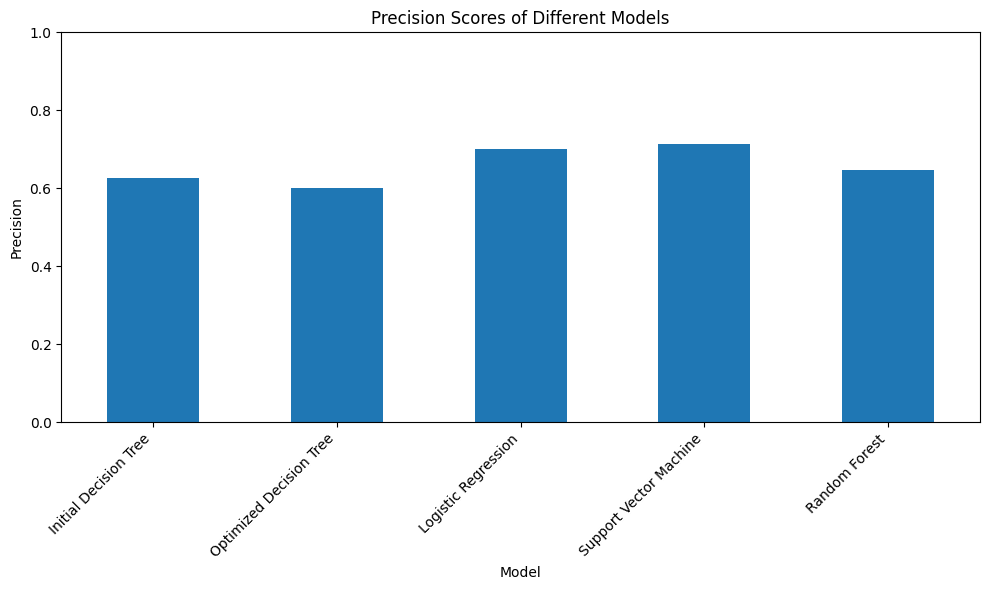

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary of model names and their precision scores
precision_scores = {
    'Initial Decision Tree': precision,
    'Optimized Decision Tree': precision_best,
    'Logistic Regression': log_reg_precision,
    'Support Vector Machine': svc_precision,
    'Random Forest': rf_precision
}

# Create a pandas Series from the dictionary
precision_series = pd.Series(precision_scores)

# Create a bar plot of precision scores
plt.figure(figsize=(10, 6))
precision_series.plot(kind='bar')
plt.title('Precision Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for precision
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Instantiate the models
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Added eval_metric to avoid warning
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the models
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)

# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

print("Gradient Boosting Performance:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1-score: {gb_f1:.2f}")
print("\nConfusion Matrix:")
display(gb_conf_matrix)

print("-" * 30)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

print("XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"F1-score: {xgb_f1:.2f}")
print("\nConfusion Matrix:")
display(xgb_conf_matrix)

print("-" * 30)

# Evaluate LightGBM
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)
lgb_conf_matrix = confusion_matrix(y_test, lgb_pred)

print("LightGBM Performance:")
print(f"Accuracy: {lgb_accuracy:.2f}")
print(f"Precision: {lgb_precision:.2f}")
print(f"Recall: {lgb_recall:.2f}")
print(f"F1-score: {lgb_f1:.2f}")
print("\nConfusion Matrix:")
display(lgb_conf_matrix)

[LightGBM] [Info] Number of positive: 41, number of negative: 460
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 501, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081836 -> initscore=-2.417654
[LightGBM] [Info] Start training from score -2.417654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:46:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


array([[147,   6],
       [  2,  13]])

------------------------------
XGBoost Performance:
Accuracy: 0.95
Precision: 0.68
Recall: 0.87
F1-score: 0.76

Confusion Matrix:


array([[147,   6],
       [  2,  13]])

------------------------------
LightGBM Performance:
Accuracy: 0.94
Precision: 0.67
Recall: 0.67
F1-score: 0.67

Confusion Matrix:


array([[148,   5],
       [  5,  10]])

Recall Scores for all models:


,0
Support Vector Machine,1.000000
Logistic Regression,0.933333
XGBoost,0.866667
Gradient Boosting,0.866667
Random Forest,0.733333
Initial Decision Tree,0.666667
LightGBM,0.666667
Optimized Decision Tree,0.600000


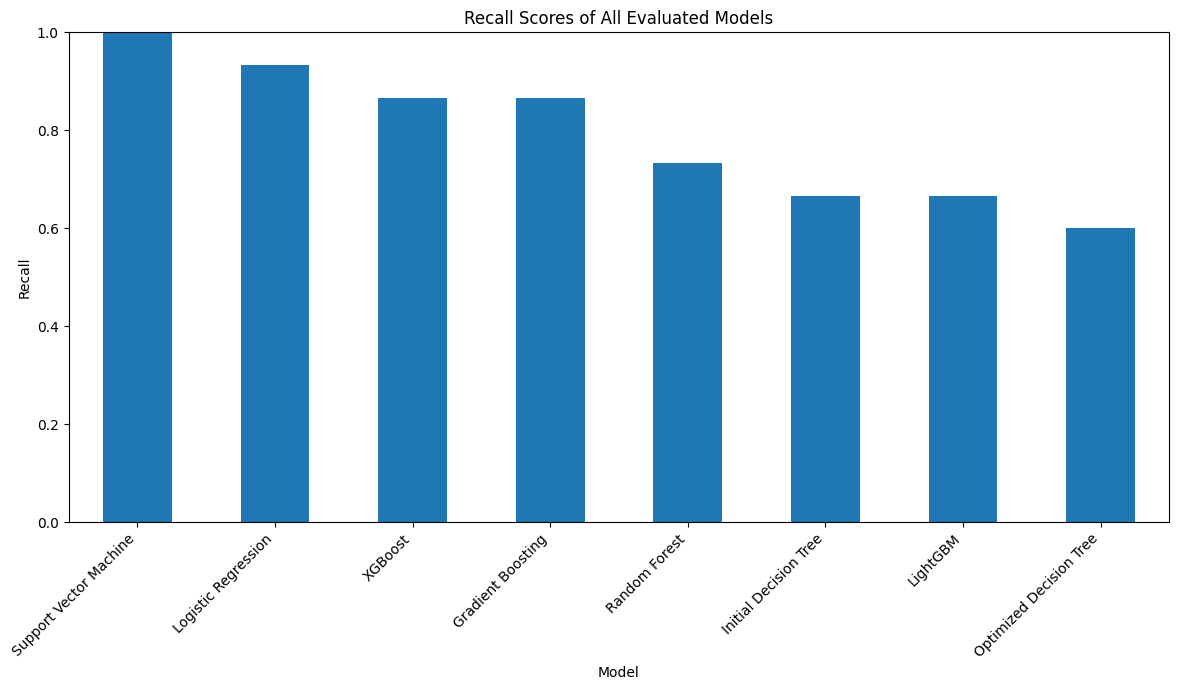

In [116]:
# Gather recall values for all models
recall_scores = {
    'Initial Decision Tree': recall,
    'Optimized Decision Tree': recall_best,
    'Logistic Regression': log_reg_recall,
    'Support Vector Machine': svc_recall,
    'Random Forest': rf_recall,
    'Gradient Boosting': gb_recall,
    'XGBoost': xgb_recall,
    'LightGBM': lgb_recall
}

# Create a pandas Series from the dictionary
recall_series = pd.Series(recall_scores)

# Print the recall scores
print("Recall Scores for all models:")
display(recall_series.sort_values(ascending=False))

# Optionally, create a bar plot for visualization
plt.figure(figsize=(12, 7))
recall_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Recall Scores of All Evaluated Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for recall
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

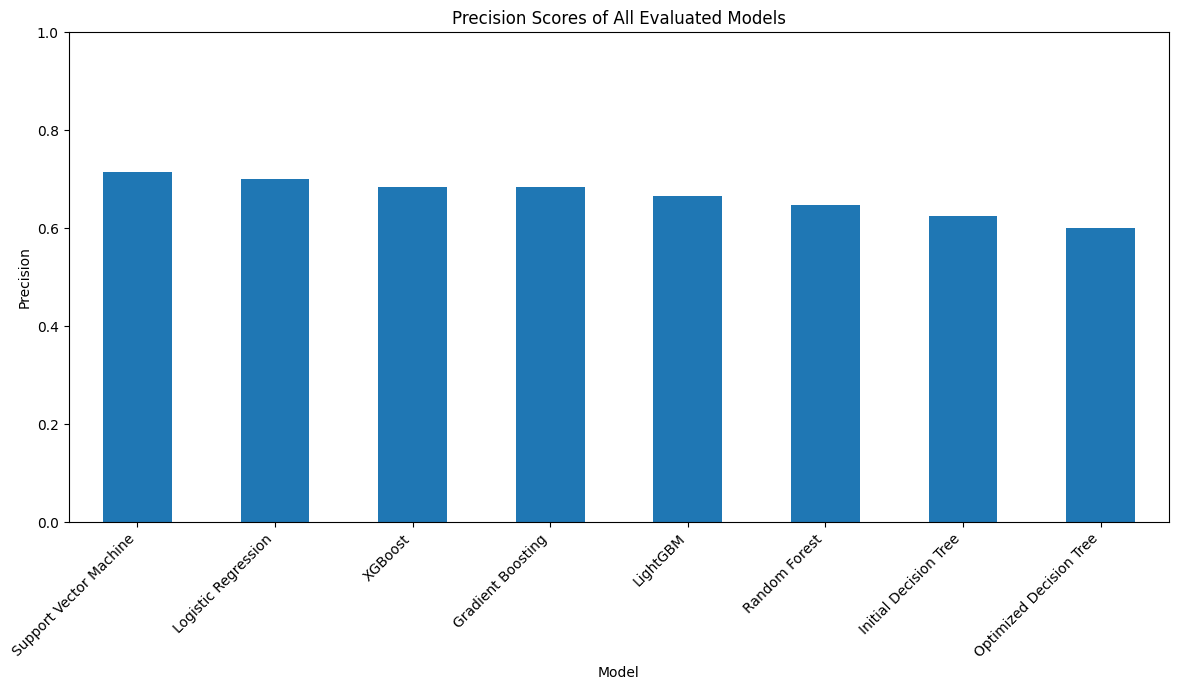


Precision Scores for all models:


,0
Support Vector Machine,0.714286
Logistic Regression,0.700000
XGBoost,0.684211
Gradient Boosting,0.684211
LightGBM,0.666667
Random Forest,0.647059
Initial Decision Tree,0.625000
Optimized Decision Tree,0.600000


In [112]:
# Add precision scores of boosting models to the existing precision_scores dictionary
precision_scores['Gradient Boosting'] = gb_precision
precision_scores['XGBoost'] = xgb_precision
precision_scores['LightGBM'] = lgb_precision

# Update the pandas Series and create a bar plot of all precision scores
precision_series = pd.Series(precision_scores)

plt.figure(figsize=(12, 7))
precision_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Precision Scores of All Evaluated Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for precision
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

print("\nPrecision Scores for all models:")
display(precision_series.sort_values(ascending=False))